In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

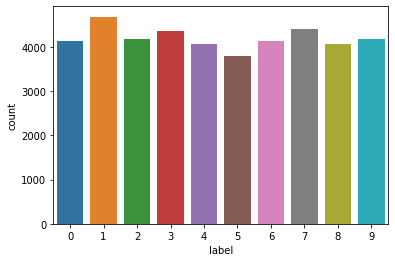

In [6]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)
#Y_train.value_counts()

In [9]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [20]:
# Normalize the data
#X_train = X_train / 255.0
#test = test / 255.0

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5), (0.5, 0.5))])

In [21]:
transform(X_train.values[0])

ValueError: pic should be 2/3 dimensional. Got 1 dimensions.

In [22]:
X_train.values[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
X_train.shape

(42000, 784)

In [8]:
X_train, X_val, Y_train, Y_val =train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_val = X_val.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
X_train.shape

(29400, 28, 28, 1)

In [11]:
inputs = keras.Input(shape=(28,28,1), name = 'Input')

conv1 = layers.Conv2D(32, 3,strides = 1,activation='relu',name = 'conv1')(inputs)
conv2 = layers.Conv2D(32, 3,strides = 1,activation='relu',name = 'conv2')(conv1)
conv3 = layers.Conv2D(32, 3,strides = 1,activation='relu',name = 'conv3')(conv2)

flat = layers.Flatten()(conv3)
dense = layers.Dense(64,activation='relu')(flat)
outputs = layers.Dense(10,activation='softmax')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 32)        9248      
_________________________________________________________________
conv3 (Conv2D)               (None, 22, 22, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                991296    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650   

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train.values,validation_data=[X_val,Y_val.values],epochs=5)

Train on 29400 samples, validate on 12600 samples
Epoch 1/5
29400/29400 [==============================] - 4s 149us/sample - loss: 0.1740 - accuracy: 0.9472 - val_loss: 0.0692 - val_accuracy: 0.9787
Epoch 2/5
29400/29400 [==============================] - 3s 104us/sample - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0616 - val_accuracy: 0.9817
Epoch 3/5
29400/29400 [==============================] - 3s 106us/sample - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0509 - val_accuracy: 0.9856
Epoch 4/5
29400/29400 [==============================] - 3s 103us/sample - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0643 - val_accuracy: 0.9825
Epoch 5/5
29400/29400 [==============================] - 3s 100us/sample - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0598 - val_accuracy: 0.9856


# output predict

In [17]:
predict = model.predict(test)

In [34]:
ans = list()
id_list = np.arange(len(predict))+1


for idx, arr in enumerate(predict):
    ans.append(np.argmax(arr))

In [37]:
out = pd.DataFrame()

In [38]:
out['ImageId'] = id_list
out['Label'] = ans

In [40]:
out.to_csv('sample.csv',index=False)